### Stochastic SIR model (discrete state, continuous time) in R/Rcpp

In [1]:
library(reshape2)
library(Rcpp)

In [2]:
cppFunction('
  List sirc(double beta, double gamma, double N, double S0, double I0, double R0, double tf){
    double t = 0;
    double S = S0;
    double I = I0;
    double R = R0;
    std::vector<double> ta;
    std::vector<double> Sa;
    std::vector<double> Ia;
    std::vector<double> Ra;
    do{
      ta.push_back(t);
      Sa.push_back(S);
      Ia.push_back(I);
      Ra.push_back(R);
      double pf1 = beta*S*I;
      double pf2 = gamma*I;
      double pf = pf1+pf2;
      double dt = rexp(1,pf)[0];
      t += dt;
      double r = runif(1)[0];
      if(r<pf1/pf){
        S--;
        I++;
      }else{
        I--;
        R++;
      }
      if(I==0){break;}
    } while (t<=tf && (I>0));
  return List::create(_["time"] = ta, _["S"] = Sa, _["I"] = Ia, _["R"]=Ra);
  }'
)

In [3]:
set.seed(42)

In [4]:
sir_out_list <- sirc(0.1/1000,0.05,1000,999,1,0,200)

In [5]:
sir_out <- as.data.frame(sir_out_list)

In [6]:
if(dim(sir_out)[1]==1){
    sir_out_list <- sirc(0.1/1000,0.05,1000,999,1,0,200)
    sir_out <- as.data.frame(sir_out_list)
}

In [7]:
head(sir_out)

time,S,I,R
0.000000,999,1,0
1.891201,998,2,0
3.470562,997,3,0
4.169704,997,2,1
8.149657,996,3,1
11.145904,995,4,1


In [8]:
sir_out_long <- melt(sir_out,"time")

#### Visualisation

In [9]:
library(ggplot2)

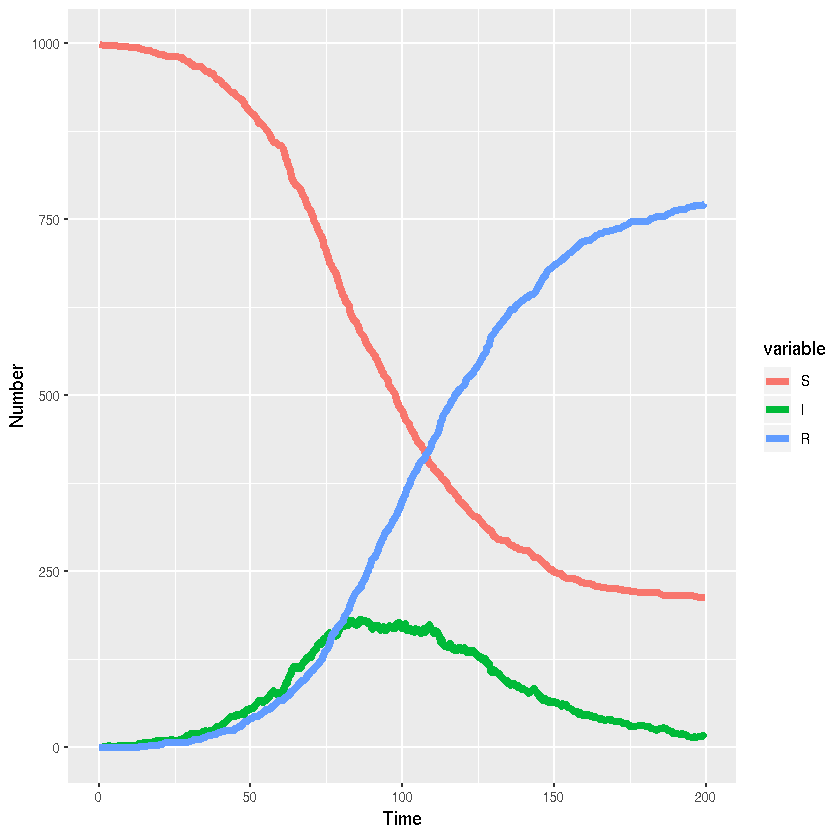

In [10]:
ggplot(sir_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")